In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

In [2]:
data = pd.read_csv("ACT_07_Data.csv")

Understanding the data...

In [3]:
data.head()

,ID,LotArea,TotalBsmtSF,GarageCars,AGE,TotalArea,SalePrice
0,1,12108,1440,0,53,1440,118000
1,2,9400,945,0,31,980,127500
2,3,1680,672,0,35,1218,91500
3,4,8430,1040,0,31,1040,124000
4,5,7500,1080,0,4,1080,141000


In [4]:
data.shape

(1460, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           1460 non-null   int64
 1   LotArea      1460 non-null   int64
 2   TotalBsmtSF  1460 non-null   int64
 3   GarageCars   1460 non-null   int64
 4   AGE          1460 non-null   int64
 5   TotalArea    1460 non-null   int64
 6   SalePrice    1460 non-null   int64
dtypes: int64(7)
memory usage: 80.0 KB


In [6]:
data.describe()

,ID,LotArea,TotalBsmtSF,GarageCars,AGE,TotalArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,10516.828082,1057.429452,1.767123,36.547945,1509.619178,180921.195890
std,421.610009,9981.264932,438.705324,0.747315,30.250152,521.163523,79442.502883
min,1.000000,1300.000000,0.000000,0.000000,0.000000,334.000000,34900.000000
25%,365.750000,7553.500000,795.750000,1.000000,8.000000,1123.750000,129975.000000
50%,730.500000,9478.500000,991.500000,2.000000,35.000000,1458.000000,163000.000000
75%,1095.250000,11601.500000,1298.250000,2.000000,54.000000,1775.250000,214000.000000
max,1460.000000,215245.000000,6110.000000,4.000000,136.000000,5642.000000,755000.000000


In [7]:
#id is of no use in prediction hence dropped.
data = data.drop('ID',axis=1)
y = data['SalePrice'].values
data = data.drop("SalePrice",axis = 1)
X = data.values

In [8]:
y

array([118000, 127500,  91500, ..., 240000, 135000, 133900], dtype=int64)

def BagofTrees(X,y,ntrees):
    predictions=[]
    errors = []
    n_rows=X.shape[0]
    n_cols=X.shape[1]
    sumypred=np.zeros(n_rows)
        
    # STEP 01: Randomly select a sample of size 1,460 with replacement.
    
    for i in range(ntrees):
        
        rows=np.random.choice(range(n_rows), n_rows*60//100, replace=True)
        sX=X[rows,:]
        sy=y[rows].reshape(-1,1)
        nrows=np.random.choice(range(n_rows*60//100), n_rows-(n_rows*60//100) , replace=True)
        nsX=sX[nrows]
        nsy=sy[nrows].reshape(-1,1)
        sampX=np.vstack([sX,nsX])
        sampy=np.vstack([sy,nsy])
        
        print(sampX.shape)
        
        # STEP 02: Build a decision trees model to predict the â€œHousePriceâ€ 
        clf=DecisionTreeRegressor()
        clf.fit(sampX,sampy)
        
        #keep all the predicted values for each observation
        ypred=clf.predict(X)
        predictions.append(ypred)
        
    #calculate the bagging estimator
    sumypred=np.zeros(n_rows)
    for ypred in predictions:
        sumypred=sumypred + ypred      
    ybag = 1/ntrees*sumypred
    
    #calculate the error estimator
    sumsqrderror=np.zeros(n_rows)
    for ypred in predictions:
        sumsqrderror=sumsqrderror + np.square((ypred-ybag))
                           
    mse = 1/ntrees*sumsqrderror
    return predictions, ybag, mse

BagofTrees(X,y,20)

In [14]:
ntrees = 20
predictions=[]
errors = []
n_rows=X.shape[0]
n_cols=X.shape[1]
sumypred=np.zeros(n_rows)
        
# STEP 01: Randomly select a sample of size 1,460 with replacement.
for i in range(ntrees):
    rows=np.random.choice(range(n_rows), n_rows*60//100, replace=True)
    sX=X[rows,:]
    sy=y[rows].reshape(-1,1)
    nrows=np.random.choice(range(n_rows*60//100), n_rows-(n_rows*60//100) , replace=True)
    nsX=sX[nrows]
    nsy=sy[nrows].reshape(-1,1)
    sampX=np.vstack([sX,nsX])
    sampy=np.vstack([sy,nsy])
        
    # print(sampX.shape)
        
    # STEP 02: Build a decision trees model to predict the â€œHousePriceâ€ 
    clf=DecisionTreeRegressor()
    clf.fit(sampX,sampy)
        
    #keep all the predicted values for each observation
    ypred=clf.predict(X)
    predictions.append(ypred)
        
#calculate the bagging estimator
sumypred=np.zeros(n_rows)
for ypred in predictions:
    sumypred=sumypred + ypred      
ybag = 1/ntrees*sumypred
    
#calculate the error estimator
sumsqrderror=np.zeros(n_rows)
for ypred in predictions:
    sumsqrderror=sumsqrderror + np.square((ypred-ybag))
                           
mse = 1/ntrees*sumsqrderror
# return predictions, ybag, mse

In [15]:
predictions

[array([166000., 127500.,  91500., ..., 240000., 125000., 133900.]),
 array([118000., 127500.,  91500., ..., 239000., 125000., 133900.]),
 array([118000., 127500., 118000., ..., 240000., 135000., 133900.]),
 array([100000., 127500., 118000., ..., 239000., 135000., 106000.]),
 array([165500., 127500., 118000., ..., 240000., 135000., 133900.]),
 array([118000., 127500.,  97000., ..., 197000., 170000., 160000.]),
 array([118000., 127500.,  91500., ..., 117500., 125000., 133900.]),
 array([167000., 127500., 118000., ...,  90000., 117000., 133900.]),
 array([119000., 127500., 113000., ...,  90000., 135000., 266500.]),
 array([118000., 127500.,  91500., ..., 242000.,  58500., 133900.]),
 array([118000., 112000.,  91500., ..., 239000., 139500., 243000.]),
 array([118000., 127500.,  76500., ..., 240000., 153575., 256000.]),
 array([157900., 127500.,  76500., ..., 240000., 157500., 122000.]),
 array([157900., 112000.,  91500., ..., 240000., 135000., 151400.]),
 array([185000., 128500., 118000.,

In [16]:
ybag

array([137535.  , 123895.  , 101575.  , ..., 206748.5 , 131403.75,
       165495.  ])

In [17]:
mse

array([6.74910275e+08, 1.61104475e+08, 2.09456875e+08, ...,
       3.38660779e+09, 6.36206017e+08, 2.77027048e+09])

Text(0, 0.5, 'Price')

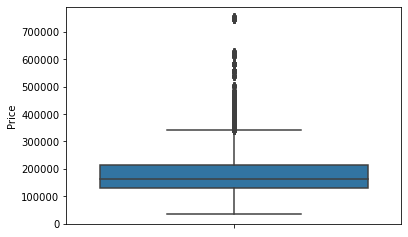

In [18]:
#boxplot for all 20 bagging predictions
sns.boxplot(y = np.array(predictions))
plt.ylabel("Price")